In [1]:
"""
Parte 0: Il Dataset

    Il datataset contiene dati che descrivono i dipendenti di una impresa secondo le seguenti
    feature (l’ordine delle feature nel dataset potrebbe essere diverso):
        1. Employee satisfaction level
        2. Last evaluation
        3. Number of projects
        4. Average monthly hours
        5. Time spent at the company
        6. Whether they have had a work accident
        7. Whether they have had a promotion in the last 5 years
        8. Sales
        9. Salary
        10. Whether the employee has left
        
Scopo finale del dataset è predire se un dipendente abbandonerà o meno l’impresa.

"""
# IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
PUNTO 1.1
    
    Caricare il dataset e denominarlo con una variabile chiamata “dataset”
"""
dataset = pd.read_csv('HR_comma_sep_orig.csv')

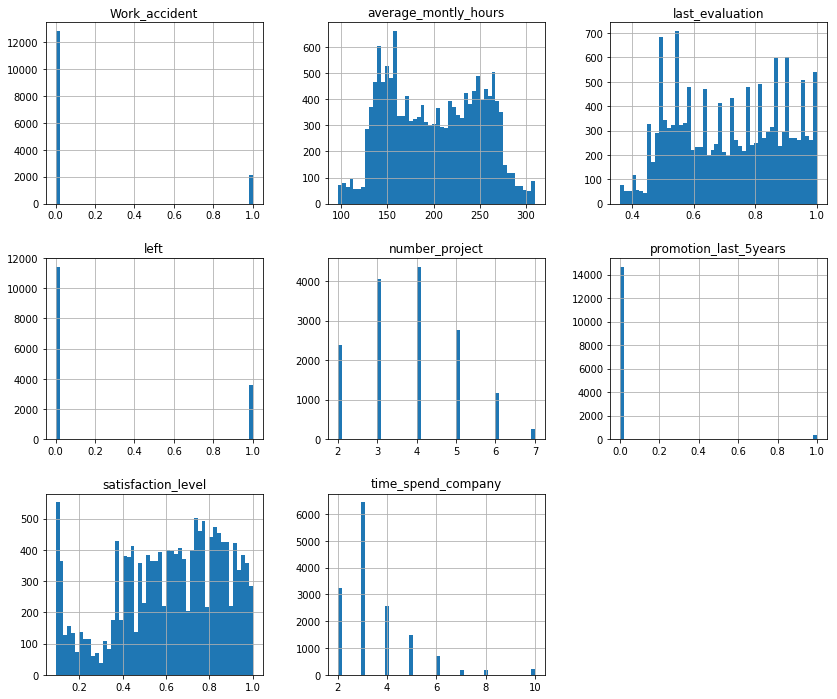

In [3]:
# Ai fini della didattica visualizzare le colonne del dataset
dataset.hist(figsize = (14, 12), bins = 50)
plt.show()

In [4]:
"""
PUNTO 1.2

    Quante sono le istanze contenute nel dataset? Il dataset è completo (cioè per ogni istanza tutti 
    i valori di attributo sono sempre specificati – non esistono “missing values”)? Il dataset è bilanciato 
    per quanto riguarda la classe da predire? Osservando direttamente i dati, in che modo l’avere avuto
    una promozione negli ultimi 5 anni ha influito sulla scelta del dipendente di abbandonare l’impresa.
"""
# Calcolo il numero di istanze
num_istance = dataset.shape[0]
print('Numero di istanze: {}'.format(num_istance))

# Calcolo il numero di valori nulli
num_for_columns_NaN = dataset.isnull().sum()
num_NaN = num_for_columns_NaN.sum()
print('Numero di instanze nulle: {}'.format(num_NaN))
    
# Considero ora la colonna 'left' ho una rappresentazione dei dipendenti che sono rimasti e quelli 
# che se ne sono andati
array_left = dataset.groupby(['left']).size()
num_yes = array_left[1]
num_no = array_left[0]
print('Dipendenti che hanno lasciato la compagnia: {}'.format(num_yes))
print('Dipendenti che sono rimasti: {}'.format(num_no))
    
# Analizzo i dipendenti che hanno avuto una promozione
array_promotion = dataset.groupby(['promotion_last_5years']).size()
promotion_yes = array_promotion[1]
promotion_no = array_promotion[0]
print('Dipendenti che hanno avuto una promozione: {}'.format(promotion_yes))
print('Dipendenti che non hanno avuto una promozione: {}'.format(promotion_no))

dataset.groupby(['left', 'promotion_last_5years']).mean().unstack()

Numero di istanze: 14999
Numero di instanze nulle: 0
Dipendenti che hanno lasciato la compagnia: 3571
Dipendenti che sono rimasti: 11428
Dipendenti che hanno avuto una promozione: 319
Dipendenti che non hanno avuto una promozione: 14680


satisfaction_level           last_evaluation            \
promotion_last_5years                  0         1               0         1   
left                                                                           
0                               0.666766  0.668433        0.715527  0.713467   
1                               0.439992  0.460000        0.718806  0.588421   

                      number_project           average_montly_hours  \
promotion_last_5years              0         1                    0   
left                                                                  
0                           3.786395  3.796667           199.001168   
1                           3.859797  3.052632           207.577984   

                                  time_spend_company           Work_accident  \
promotion_last_5years           1                  0         1             0   
left                                                                           
0                      201.250000           3.357297  4.223333      0.173257   
1                      177.736842           3.879786  3.263158      0.046453   

                                 
promotion_last_5years         1  
left                             
0                      0.240000  
1                      0.210526

Media:
satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

Mediana:
satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64


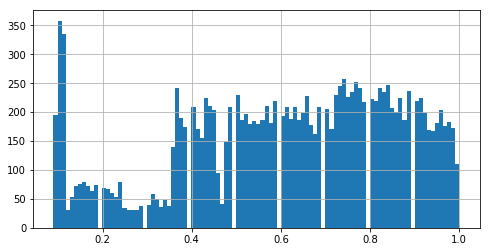

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,,,,,,,,
"(0.0, 0.1]",0.096474,0.869295,6.198915,275.699819,4.101266,0.041591,1.000000,0.000000
"(0.1, 0.2]",0.143968,0.773243,5.140541,231.134054,4.324324,0.131892,0.401081,0.016216
"(0.2, 0.3]",0.247711,0.681231,4.358531,197.444924,4.365011,0.190065,0.049676,0.017279
"(0.3, 0.4]",0.370516,0.561902,2.621302,155.961961,3.272189,0.071006,0.666103,0.010144
"(0.4, 0.5]",0.454733,0.600113,2.878555,170.383886,3.267773,0.119668,0.482820,0.022512
"(0.5, 0.6]",0.555816,0.715123,3.669275,199.128326,3.237872,0.163798,0.026082,0.030256
"(0.6, 0.7]",0.654706,0.719711,3.748479,200.420892,3.299696,0.182556,0.019270,0.019270
"(0.7, 0.8]",0.755732,0.760462,3.870209,207.748693,3.501742,0.153310,0.167247,0.025697
"(0.8, 0.9]",0.854243,0.768215,3.944545,212.580703,3.610009,0.136610,0.219116,0.022994


In [5]:
"""
PUNTO 1.3

    Guardando la media e la mediana si evince che i dipendenti che lavorano
    nell’impresa sono in generale soddisfatti? Se si rappresenta un istogramma della soddisfazione 
    dei dipendenti (usare il parametro bins=100 nella funzione che realizza l’istogramma) si osserva 
    che c’è un blocco iniziale di dipendenti per nulla soddisfatti. Calcolare il valore di 
    insoddisfazione di questo blocco di dipendenti.
    
    Che cosa hanno in comune questi dipendenti (a parte il livello di soddisfazione basso)?

"""
print('Media:\n{}\n'.format(dataset.mean()))
print('Mediana:\n{}'.format(dataset.median()))

array_satisfaction = dataset['satisfaction_level']
array_satisfaction.hist(figsize=(8, 4), bins = 100)
plt.show()

satisfaction_grouped = pd.cut(dataset['satisfaction_level'], np.arange(0, 1.01, 0.1))
dataset.groupby(satisfaction_grouped).mean()

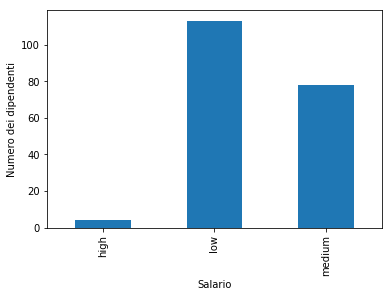

In [6]:
"""
PUNTO 1.4
    Rappresentare in un grafico il salario dei dipendenti insoddisfatti descritti nel punto
    precedente.
"""
dip_ins = dataset[dataset['satisfaction_level'] < 0.1]
salary = dip_ins.groupby(['salary']).size()
salary.plot(kind = 'bar')
plt.xlabel('Salario')
plt.ylabel('Numero dei dipendenti')
plt.show()

In [7]:
"""
PUNTO 1.5
    Analizzare i settori (attributo “sales”) in cui i dipendenti insoddisfatti sono collocati.
    C’è un settore che è maggiormente fonte di disagio?
"""
dip_ins.groupby(dip_ins['sales']).size()

sales
IT             18
RandD           5
accounting      8
hr             14
management      3
marketing       6
product_mng    13
sales          50
support        28
technical      50
dtype: int64

In [8]:
"""
PUNTO 1.6
    Scikit-learn utilizza un array numpy per effettuare le proprie predizioni. Gli elementi
    dell’array numpy devono essere delle stesso data type numerico. E’ necessario pertanto
    trasformare i dati del dataset per renderli utilizzabili con scikit.
    Creare un nuovo dataset dal precedente e chiamarlo reduced in si considerano
    unicamente le feature numeriche.
"""
reduced = dataset.drop(['sales', 'salary'], axis = 1)

In [9]:
"""
PUNTO 2.2
    Nel dataset originale, trasformare i valori dei campi non numerici in numerici,
    utilizzando una opportuna funzione di trasformazione.
"""
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset = dataset.apply(le.fit_transform)

### Punto 2.3

In [10]:
"""
    Si vuole predire il il fatto che un dipendente abbia lasciato o meno l’impresa (feature
    left) sulla base degli altri attributi presenti nel dataset. Dividere i due dataset (quello
    originale e quello ridotto) in modo che 3⁄4 degli elementi siano contenuti in un nuovo
    dataset “train” e 1⁄4 nel dataset “test”.
    
    Valutare l’accuracy ottenuta con il modello MultinomialNB su entrambi i dataset
    (from sklearn.naive_bayes import MultinomialNB)
"""
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = dataset.drop('left', axis = 1)
Y = dataset['left']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 147)
model_mnb = MultinomialNB()
model_mnb.fit(X_train, Y_train)
model_mnb.score(X_test, Y_test)

0.66053333333333331

### Punto 2.4

In [11]:
"""
    Il valore di accuratezza ottenuto è pari a. 
    
    Cosa si scopre analizzando le confusion matrix?
"""
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model_mnb.predict(X_test)
accuracy_score(Y_test, y_pred)

print('Confusion matrix:\n{}'.format(confusion_matrix(Y_test, y_pred)))

Confusion matrix:
[[2190  658]
 [ 615  287]]


### Punto 2.5

In [12]:
"""
    Se si utilizza un modello basato su Decision Tree che valore di accuratezza si ottiene?
    Cambia qualcosa nella confusion matrix?
"""

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)
print('Score: {}'.format(model_dt.score(X_test, Y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(model_dt.predict(X_test), Y_test)))

Score: 0.9781333333333333
Confusion matrix:
[[2797   31]
 [  51  871]]


### Punto 2.6

In [13]:
"""
    Che valore di accuratezza si ottiene con un 5 Fold cross validation e il modello basato
    su Decision Tree? E il modello basato su MultinomialNB?
"""
from sklearn.cross_validation import cross_val_score
num_folds = 5
random_state = 141
scoring = 'accuracy'

# Accuratezza Decision Tree
print('Score 5 Fold cross validation - DECISION TREE')
score_dt = cross_val_score(model_dt, X, Y, cv = num_folds, scoring = scoring)
print('Accuracy: {:0.3f} ({:0.3f})'.format(score_dt.mean(), score_dt.std()))

# Accuratezza MultinomialNB
print('Score 5 Fold cross validation - MULTINOMIALNB')
score_mnb = cross_val_score(model_dt, X, Y, cv = num_folds, scoring = scoring)
print('Accuracy: {:0.3f} ({:0.3f})'.format(score_mnb.mean(), score_mnb.std()))

Score 5 Fold cross validation - DECISION TREE


/home/zippo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 0.974 (0.008)
Score 5 Fold cross validation - MULTINOMIALNB
Accuracy: 0.974 (0.009)


### Punto 2.7

In [14]:
"""
Creare un dataset bilanciato rispetto l’attributo “left”, e verificare se cambia
l’accuratezza con un 5 Fold cross validation e il modello basato su Decision Tree
e il modello basato su MultinomialNB.
"""
print('TO-DO')

TO-DO


### Punto 2.8

In [15]:
"""
    Creare une versione 1-of-V della matrice (indicator matrix) per quanto riguarda le
    colonne “sales” e “salary”. Si tratta di una matrice in cui ogni colonna è trasformata in
    un numero di colonne pari alla cardinalità (i valori unici) del dominio della colonna
    originale. Ogni cella nella colonna assume un valore 0 o 1 a seconda del fatto che il
    valore inizialmente contenuto dall’attributo sia uguale a quello rappresentato dalla
    colonna
    
    Calcolare l’accuratezza con i metodi precedenti. Migliora o peggiora? Questo tipo di
    trasformazione è in generale migliore o peggiore di quella effettuata al punto 2?
"""
# Ricarido il dataset perché i valori testuali nelle colonne 'salary' e 'sales' li ho convertiti
dataset = pd.read_csv('HR_comma_sep_orig.csv')

# Aggiungo le matrici
dummy_sales = pd.get_dummies(dataset['sales'])
dummy_salary = pd.get_dummies(dataset['salary'])
dataset = pd.concat([dataset, dummy_sales], axis = 1)
dataset = pd.concat([dataset, dummy_salary], axis = 1)

# Ricalcolo X e Y - Eliminando le righe 'salary' e 'sales'
X = dataset.drop('left', axis = 1)
X = X.drop(['salary', 'sales'], axis = 1)
Y = dataset['left']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = random_state)

# Modello MultinomialNB
model_mnb = model_dt.fit(X_train, Y_train)
print('Accuracy MultinominalNB: {:0.3f}'.format(model_mnb.score(X_test, Y_test)))

# Modello Decision Tree
model_dt = model_dt.fit(X_train, Y_train)
print('Accuracy Decision Tree: {:.03f}'.format(model_dt.score(X_test, Y_test)))

Accuracy MultinominalNB: 0.977
Accuracy Decision Tree: 0.977


### Punto 2.9

In [16]:
"""
    Raggruppare i valori dell’attributo “average_montly_hours” in 6 gruppi. Sostituire al
    valore originale dell’attributo un numero che va da 1 a 6 e che indica l’appartenenza
    allo specifico gruppo. Valutare l’accuratezza.
"""
# Uso X e Y modificati al punto precendente
# Per raggruppare uso la funzione 'qcut'
num_chunks = 6
name_labels = [1, 2, 3, 4, 5, 6]
chunks = pd.qcut(X['average_montly_hours'], q = num_chunks, labels = name_labels)

# Per evitare dei problemi in future esecuzioni (cambiando il valore della colonna poi da errori)
# la copia in un nuovo dataframe
X_chunks = X.copy()
X_chunks['average_montly_hours'] = chunks.values

# Ricalcolo X e Y
X_train, X_test, Y_train, Y_test = train_test_split(X_chunks, Y, test_size = 0.25, random_state = random_state)

# Modello MultinomialNB
model_mnb = model_dt.fit(X_train, Y_train)
print('Accuracy MultinominalNB: {:0.3f}'.format(model_mnb.score(X_test, Y_test)))

# Modello Decision Tree
model_dt = model_dt.fit(X_train, Y_train)
print('Accuracy Decision Tree: {:.03f}'.format(model_dt.score(X_test, Y_test)))

Accuracy MultinominalNB: 0.973
Accuracy Decision Tree: 0.973


### Punto 2.10

In [17]:
"""
    Si consideri un nuovo dataset ottenuto attraverso una variazione a piacere del
    precedente e si analizzi l’accuratezza ottenuta con un modello basato su Decision Tree.
    Che valore si ottiene?
"""
# Provo inizialmente a normalizzare il DataFrame
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_normalizer = normalizer.fit_transform(X_chunks)

# Poi mi considero solo le features più importanti
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

estimator = SVC(kernel = 'linear')
rfe = RFE(estimator = estimator, n_features_to_select= 10)
X_features = rfe.fit_transform(X_normalizer, Y)

# Ricalcolo X e Y
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size = 0.25, random_state = random_state)

# Modello MultinomialNB
model_mnb = model_dt.fit(X_train, Y_train)
print('Accuracy MultinominalNB: {:0.3f}'.format(model_mnb.score(X_test, Y_test)))

# Modello Decision Tree
model_dt = model_dt.fit(X_train, Y_train)
print('Accuracy Decision Tree: {:.03f}'.format(model_dt.score(X_test, Y_test)))

Accuracy MultinominalNB: 0.968
Accuracy Decision Tree: 0.967
